In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

# Ignore warnings for cleaner output (optional)
warnings.filterwarnings('ignore')

<Axes: >

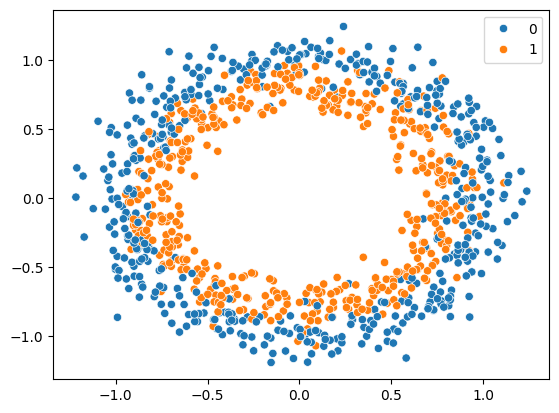

In [3]:
# Generate synthetic data using make_circles
x, y = make_circles(n_samples=1000, noise=0.1, random_state=1)

sns.scatterplot(x = x[:,0], y = x[:, 1], hue = y)

In [4]:
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [5]:
model = Sequential()

model.add(Dense(units=256, activation='relu', input_dim=2))  # Input layer with 2 features
model.add(Dense(units=1, activation='sigmoid'))  # Output layer with sigmoid for binary classification

# Ignore warnings for cleaner output (optional)
warnings.filterwarnings('ignore')

2025-02-03 14:54:47.908863: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [6]:
model.compile(optimizer= 'adam', loss = 'binary_crossentropy', metrics= ['accuracy'])

In [8]:
callback = EarlyStopping(monitor='val_loss', 
                         min_delta=0.000001 ,patience=25, verbose = 1, 
                         mode = 'auto', baseline = None, 
                         restore_best_weights=True)

In [9]:
history = model.fit(x_train, y_train, validation_data= (x_test, y_test), epochs = 3500, callbacks = callback)

Epoch 1/3500
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5169 - loss: 0.6903 - val_accuracy: 0.5500 - val_loss: 0.6864
Epoch 2/3500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5879 - loss: 0.6856 - val_accuracy: 0.6300 - val_loss: 0.6843
Epoch 3/3500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6178 - loss: 0.6838 - val_accuracy: 0.6850 - val_loss: 0.6805
Epoch 4/3500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6559 - loss: 0.6777 - val_accuracy: 0.7200 - val_loss: 0.6760
Epoch 5/3500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6784 - loss: 0.6774 - val_accuracy: 0.7100 - val_loss: 0.6713
Epoch 6/3500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7012 - loss: 0.6721 - val_accuracy: 0.7350 - val_loss: 0.6674
Epoch 7/3500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7493 - loss: 0.6623 - val_accuracy: 0.6850 - val_loss: 0.6641
Epoch 8/3500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7442 - loss: 0.6582 - val_accuracy: 0.

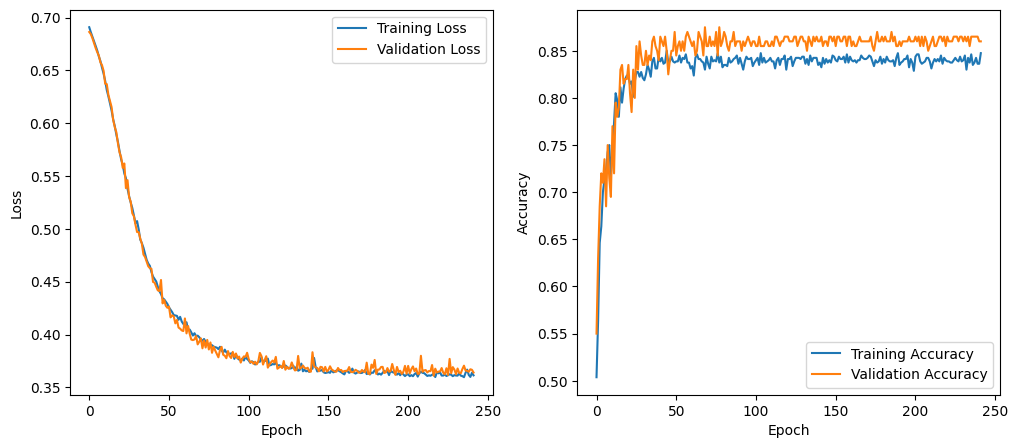

In [10]:
# Plot training history (loss and accuracy)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()